In [39]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [40]:
raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')
raw_eqk.head(3)

,time,latitude,longitude,depth,mag,id,place,type
0,2014-01-31 23:53:37.000,60.2520,-152.7081,90.2,1.10,ak11155107,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.0703,-115.1309,0.0,1.33,nn00436847,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.6717,-149.2528,7.1,1.30,ak11151142,"12km NNW of North Nenana, Alaska",earthquake


In [41]:
print(raw_eqk.type.unique())

['earthquake' 'quarry blast' 'quarry' 'mining explosion' 'rock burst'
 'explosion' 'landslide' 'sonicboom' 'sonic boom' 'anthropogenic event'
 'acoustic noise']


In [42]:

eqk = raw_eqk[(raw_eqk.type == 'earthquake') & (raw_eqk.mag >= 6.5)]
eqk

,time,latitude,longitude,depth,mag,id,place,type
1805,2014-01-26 13:55:42.210,38.2082,20.4528,8.00,6.1,usb000m8ch,"1km ENE of Lixourion, Greece",earthquake
2211,2014-01-25 05:14:18.510,-7.9855,109.2653,66.00,6.1,usb000m7wd,"38km SSE of Adipala, Indonesia",earthquake
3308,2014-01-21 01:29:07.000,-15.1443,-174.6812,6.12,6.1,usb000m5ge,"133km NW of Hihifo, Tonga",earthquake
3592,2014-01-20 02:52:44.350,-40.6595,175.8144,28.00,6.1,usb000m4i4,"35km NNE of Masterton, New Zealand",earthquake
5894,2014-01-13 04:01:03.240,19.0428,-66.8096,20.00,6.4,usc000m1w9,"61km N of Hatillo, Puerto Rico",earthquake
...,...,...,...,...,...,...,...,...
118043,2014-12-07 21:16:35.740,13.6717,-91.4731,32.00,6.1,usc000t4gc,"61km SSW of Nueva Concepcion, Guatemala",earthquake
118288,2014-12-07 01:22:02.180,-6.5108,154.4603,23.00,6.6,usc000t4cz,"115km W of Panguna, Papua New Guinea",earthquake
118324,2014-12-06 22:05:10.730,-6.1100,130.4829,116.00,6.0,usc000t4bd,"223km NNW of Saumlaki, Indonesia",earthquake
118376,2014-12-06 17:21:49.020,7.9824,-82.7339,15.00,6.0,usc000t49v,"15km ESE of Punta de Burica, Panama",earthquake


<AxesSubplot:>

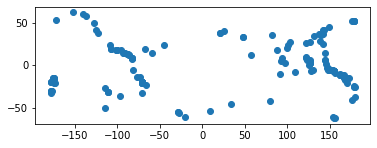

In [43]:
eqk = gpd.GeoDataFrame(eqk, 
                       geometry = gpd.points_from_xy(eqk.longitude, eqk.latitude),
                       crs='EPSG:4326'
                       )
eqk.plot()

In [44]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

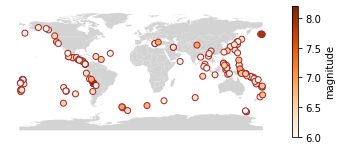

In [45]:
fig, ax = plt.subplots()
ax.axis('off')

countries.plot(ax=ax,
           color='lightgrey')
eqk.plot(ax=ax,
        column='mag',
        cmap="Oranges",
        edgecolor='brown',
        legend=True,
        legend_kwds={"shrink":.6,
                        'label': "magnitude"})


## END OF LAB === All what follows is draft stuff

In [46]:
# import countries polygons
countries = gpd.read_file('ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp')
countries.columns = countries.columns.str.lower()
countries.head(3)

,featurecla,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,tlc,admin,...,fclass_tr,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,1,Zimbabwe,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,1,Zambia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,1,Yemen,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

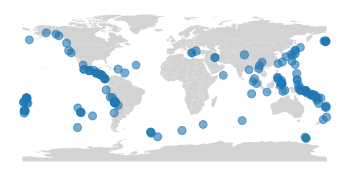

In [47]:
#https://medium.com/@kavee625/plotting-data-on-the-world-map-with-geopandas-f03742615196

fig, ax = plt.subplots()
ax.axis('off')
worldmap.plot(color="lightgrey", ax=ax)
s = eqk.mag*10
eqk.plot(ax=ax, 
        kind='scatter',
         x='longitude',
         y='latitude',
         s = s,
         alpha=0.6,
         )


<AxesSubplot:>

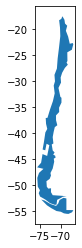

In [48]:
chile_lowres = worldmap[worldmap.name=='Chile']
chile_lowres.plot()

In [49]:
chile = countries.loc[countries.admin == 'Chile', ['admin','geometry']]
chile


,admin,geometry
198,Chile,"MULTIPOLYGON (((-109.27998 -27.14043, -109.434..."


<AxesSubplot:>

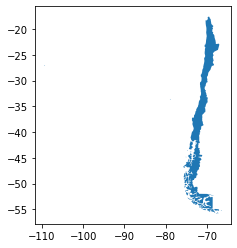

In [50]:
chile.plot()

In [51]:
chile.crs == eqk.crs

True

In [52]:
eqk.clip(chile)

,time,latitude,longitude,depth,mag,id,place,type,geometry
71590,2014-08-23 22:32:23.320,-32.6953,-71.4416,32.0,6.4,usb000s5rc,"23km WNW of Hacienda La Calera, Chile",earthquake,POINT (-71.44160 -32.69530)


In [53]:
eqk_chile = gpd.sjoin(eqk, chile,how='inner',  predicate='within')